# Regression Analysis - Number of Births

## Table of Contents 


#### Section 1: Introduction
   1. Objective and Outline
   1. Data loading & Preparation
---

#### Section 2: Two Regression Models for the Number of Births

   1. Model 1
   1. Model 2
---

#### Section 3: Comparing the Models with the Bootstrap Technique

---

#### Section 4: Discussion

---

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
#%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Section 1: Introduction

### 1.1) Objective and Outline

The overarching task of the report is as follows:

Complete and compare two regression models to explain the variability of the number of births, to test the idea that the number of stork pairs is a signifant predictor of the birth rate for any given country in our dataset.

the aforementioned task will be achieved in the following sections:



### 1.2) Data Loading & Preparation

Quick inspection of the 'average_flat_prices.csv' dataset. Previewing the data, checking the structure, missing values and statistical summary:

In [92]:
df = pd.read_csv('modified_stork_data.csv')

df

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita,PopDensity
0,Albania,28750,100,3.2,83,3983,0.1113
1,Austria,83860,300,7.6,87,26930,0.0906
2,Belgium,30520,1,9.9,118,27412,0.3244
3,Bulgaria,111000,5000,9.0,117,8922,0.0811
4,Denmark,43100,9,5.1,59,29412,0.1183
5,France,544000,140,56.0,774,28129,0.1029
6,Germany,357000,3300,78.0,901,25391,0.2185
7,Greece,132000,2500,10.0,106,15964,0.0758
8,Holland,41900,4,15.0,188,27515,0.3580
9,Hungary,93000,5000,11.0,124,10296,0.1183


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         17 non-null     object 
 1   Area            17 non-null     int64  
 2   Storks          17 non-null     int64  
 3   Humans          17 non-null     float64
 4   BirthRate       17 non-null     int64  
 5   GDP_per_capita  17 non-null     int64  
 6   PopDensity      17 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ KB


## Section 2: Two Regression Models for the Number of Births


The aim of this section is fit two regression of varying complexities models to our data.

The  section will be split into 3 parts:

* Model 1
* Model 2

### 2.1) Model 1

The first model involves the number of storks as the predictor variable, and the birth rate as the dependent variable.

The first step is to fit a simple linear regression model to assess a relationship between the predictor (Storks) and the dependent variable (Birth Rate):

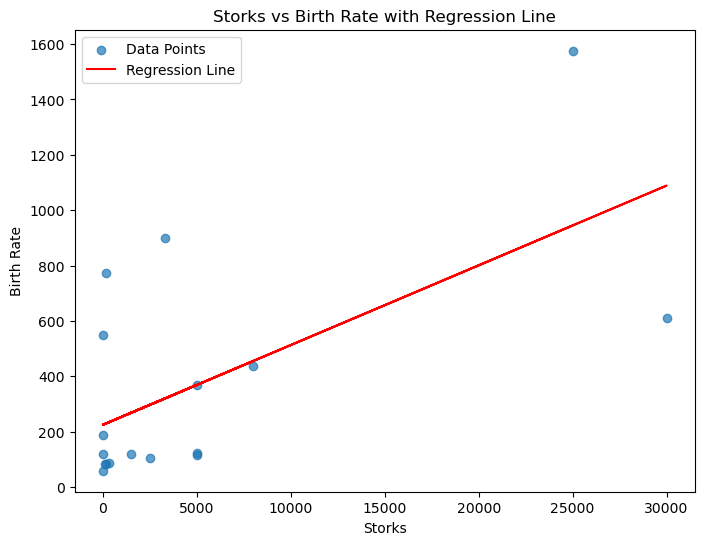

In [94]:
#Scatter plot of Storks vs BirthRate with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points', alpha=0.7)
plt.plot(X, y_pred, color='red', label='Regression Line')  #  regression line
plt.xlabel('Storks')
plt.ylabel('Birth Rate')
plt.title('Storks vs Birth Rate with Regression Line')
plt.legend()
plt.show()

The cell below the key metrics and coefficients associated with our first model:

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Defining the predictor (X) and dependent variable (y)
X = df[['Storks']]  # Predictor 
y = df['BirthRate']  # Response variable

#Fit the simple linear regression model
model = LinearRegression()  
model.fit(X, y) 

#Model coefficients
beta_0 = model.intercept_  # Intercept
beta_1 = model.coef_[0]  # Slope (coefficient for Storks)

# The regression equation
print(f"Regression Equation: BirthRate = {beta_0:.4f} + ({beta_1:.4f} * Storks)")

y_pred = model.predict(X)

# Step 5: Evaluate the model
# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R²
r_squared = r2_score(y, y_pred)
print(f"R² (Coefficient of Determination): {r_squared:.4f}")





Regression Equation: BirthRate = 225.0287 + (0.0288 * Storks)
Root Mean Squared Error (RMSE): 312.0338
R² (Coefficient of Determination): 0.3847


Next step is residual analysis, which is important in evaluating the performance of any regression model. Residuals are the differences between the observed birth rate and the birth rate predicted by our model. The produced histogram shows representation of the frequency of residuals.

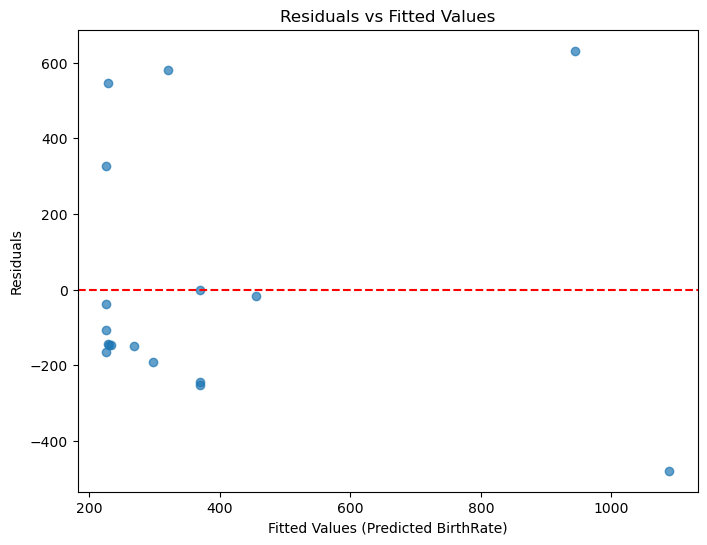

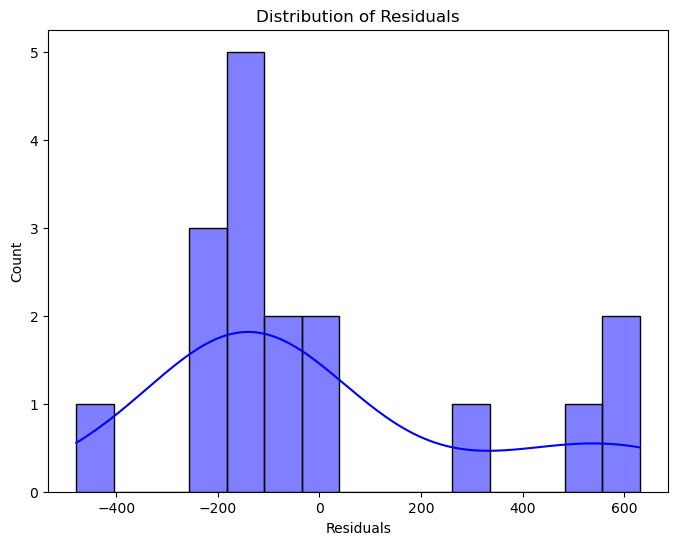

In [96]:
residuals = y - y_pred

# Residuals vs Fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted BirthRate)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=15, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Explanation of Metrics for Model 1

#### **1. Regression Coefficients**
- **Intercept (beta_0 ):**
  - Represents the predicted value of the response variable (`BirthRate`) when the predictor (`Storks`) is 0.
  - It is the starting point of the regression line on the y-axis.
- **Slope (beta_1):**
  - Indicates the expected change in the response variable (`BirthRate`) for every one-unit increase in the predictor variable (`Storks`).
  - Example: If beta_1 = 2, every additional stork pair is associated with an increase of 2 in `BirthRate`.

---

#### **2. Root Mean Squared Error (RMSE)**
- **What it Represents:**
  - RMSE is a measure of the average magnitude of errors in the model’s predictions.
  - It quantifies how far, on average, the predicted values are from the actual observed values.
- **Value in Context:**
  - RMSE = 312.0338 means that, on average, the predicted `BirthRate` deviates by about 312 units from the actual observed values.
  - Lower RMSE indicates better prediction accuracy.

---

#### **3. \( R^2 \) (Coefficient of Determination)**
- **What it Represents:**
  - \( R^2 \) measures the proportion of variance in the response variable (`BirthRate`) explained by the predictor variable (`Storks`).
- **Value in Context:**
  - \( R^2 = 0.3847 \): About 38.47% of the variation in `BirthRate` is explained by the number of storks.
  - The remaining 61.53% is due to factors not included in the model or random noise.


---

We can therefore infer that:
- The relationship is moderately positive (\( r = 0.6203 \)), but the model only explains 38.47% of the variation in `BirthRate` (\( R^2 = 0.3847 \)).
- The RMSE value indicates room for improvement, as there is substantial error in predictions.


### 2.2) Model 2:

In [97]:
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Humans', 'GDP_per_capita', 'PopDensity']]  # Predictors
y = df['BirthRate']  # dependent variable

# linear regression model
model = LinearRegression()  
model.fit(X, y)  # Fit the model to the data

# Extracting model coefficients
beta_0 = model.intercept_  # Intercept
coefficients = model.coef_  # Coefficients for the predictors

# Print the regression equation
print("Regression Equation:")
print(f"BirthRate = {beta_0:.4f} + ({coefficients[0]:.4f} * Humans) + ({coefficients[1]:.4f} * GDP_per_capita) + ({coefficients[2]:.4f} * PopDensity)")

y_pred = model.predict(X)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R2
r_squared = r2_score(y, y_pred)
print(f"R² (Coefficient of Determination): {r_squared:.4f}")

Regression Equation:
BirthRate = 173.9461 + (15.0837 * Humans) + (-0.0079 * GDP_per_capita) + (-274.8861 * PopDensity)
Root Mean Squared Error (RMSE): 189.2634
R² (Coefficient of Determination): 0.7736


Analogous residual analysis for the second model:

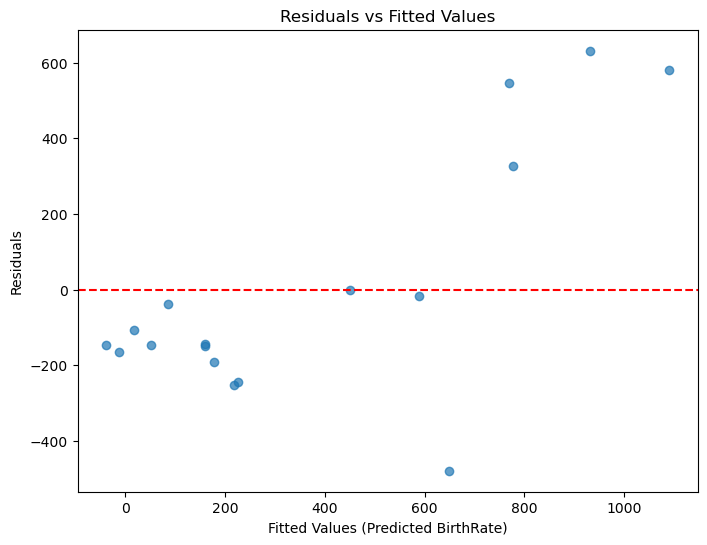

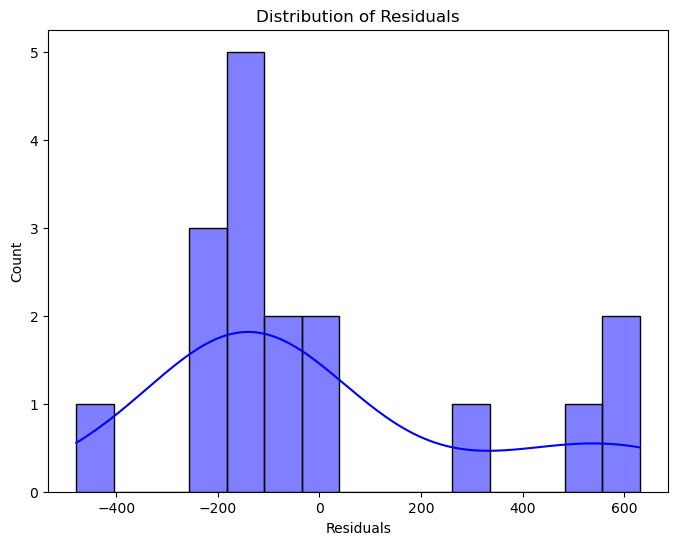

In [98]:
# Residuals vs Fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted BirthRate)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=15, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Explanation of Metrics for Model 2

#### **1. Regression Coefficients**
- **Intercept (beta_0):**
  - Represents the predicted value of the response variable (`BirthRate`) when all predictors (`Humans`, `GDP_per_capita`, and `PopDensity`) are 0.
  - It serves as the baseline birth rate under this condition.

- **Coefficients (beta_1, beta_2, beta_3):**
  - **beta_1 = 15.0837** for `Humans`:
    - Indicates the expected change in `BirthRate` for every additional million people in the population, keeping other predictors constant.
    - Example: For every increase of 1 million in `Humans`, `BirthRate` increases by approximately 15.0837 units.
  - **beta_2 = -0.0079** for `GDP_per_capita`:
    - Indicates the expected change in `BirthRate` for every 1-dollar increase in GDP per capita, keeping other predictors constant.
    - Example: A 1000-dollar increase in GDP per capita results in a decrease of approximately 7.9 units in `BirthRate`.
  - **beta_3 = -274.8861** for `PopDensity`:
    - Indicates the expected change in `BirthRate` for every unit increase in population density, keeping other predictors constant.
    - Example: A 0.001 increase in population density decreases `BirthRate` by 0.2749 units.

---

#### **2. Root Mean Squared Error (RMSE)**
- **What it Represents:**
  - RMSE measures the average magnitude of errors in the model’s predictions.
  - It quantifies how far, on average, the predicted values are from the actual observed values.

- **Value in Context:**
  - RMSE = 189.2634 means that, on average, the predicted `BirthRate` deviates by about 189 units from the actual observed values.
  - This is a significant improvement compared to Model 1 (RMSE = 312.0338), suggesting that adding more predictors improves prediction accuracy.

---

#### **3. \( R^2 \) (Coefficient of Determination)**
- **What it Represents:**
  - \( R^2 \) measures the proportion of variance in the response variable (`BirthRate`) explained by the predictors (`Humans`, `GDP_per_capita`, and `PopDensity`).

- **Value in Context:**
  - \( R^2 = 0.7736 \): About 77.36% of the variation in `BirthRate` is explained by the three predictors.
  - The remaining 22.64% is due to factors not included in the model or random noise.
  - This is a notable improvement over Model 1 (\( R^2 = 0.3847 \)).

---

### **Inference**
- The inclusion of additional predictors (`Humans`, `GDP_per_capita`, and `PopDensity`) improves the model's explanatory power:
  - The \( R^2 \) increased from 38.47% in Model 1 to 77.36% in Model 2.
  - The RMSE decreased from 312.0338 in Model 1 to 189.2634 in Model 2, indicating better prediction accuracy.

- However:
  - The relationship between `GDP_per_capita` and `BirthRate` is negative, suggesting that higher GDP per capita correlates with a reduced birth rate, which could reflect socioeconomic trends.
  - Population density (`PopDensity`) also negatively affects `BirthRate`, likely due to demographic factors.
  - The population size (`Humans`) positively influences `BirthRate`.


## Section 3: Comparing the Models with the Bootstrap Technique

The bootstrap technique is a resampling method used to estimate the sampling distribution of a statistic by repeatedly resampling with replacement from the observed data. It is particularly useful in our case since we have a small sample size with only 16 data observations. This method can estimate confidence intervals (CI), which is a range of values used to estimate an unknown population parameter, such as the mean or median. 


The first step of the workflow is to resample the dataset with a bootstrap function:

In [113]:
from sklearn.utils import resample
def bootstrapC(df, cols, repeats, func):

    result = pd.DataFrame(data={c: np.empty(repeats) for c in cols})
    for i in range(repeats):
        result.iloc[i] = func(resample(df))  # Resample the data and apply the function
    return result

Next, we are passing the regression function through through the bootstrapC function, and generating 500 bootstrap samples. This is done for both models:

In [114]:
def doRegression(df):
    
    y = df['BirthRate']  # Target variable
    X = df[['Storks']]  # Predictor variable (note double brackets for DataFrame format)
    reg = LinearRegression().fit(X, y)  # Fit the regression model
    return [reg.intercept_, reg.coef_[0], reg.score(X, y)]  # Intercept, slope, R^2

def doRegression_model2(df):
    """
    Perform linear regression for Model 2 using 'Humans', 'GDP_per_capita', and 'PopDensity' as predictors.
    """
    y = df['BirthRate']  # Target variable
    X = df[['Humans', 'GDP_per_capita', 'PopDensity']]  # Predictor variables
    reg = LinearRegression().fit(X, y)  # Fit the regression model
    return [reg.intercept_, *reg.coef_, reg.score(X, y)]  # Intercept, coefficients, R^2

bstrap = bootstrapC(df, ['Intercept', 'Slope (Storks)', 'R2'], repeats=1000, func=doRegression)
bstrap_model2 = bootstrapC(
    df, 
    ['Intercept', 'BetaHumans', 'BetaGDP', 'BetaPopDensity', 'R2'], 
    repeats=500, 
    func=doRegression_model2
)


Visualisation of the bootstrap distribution for Model 1:

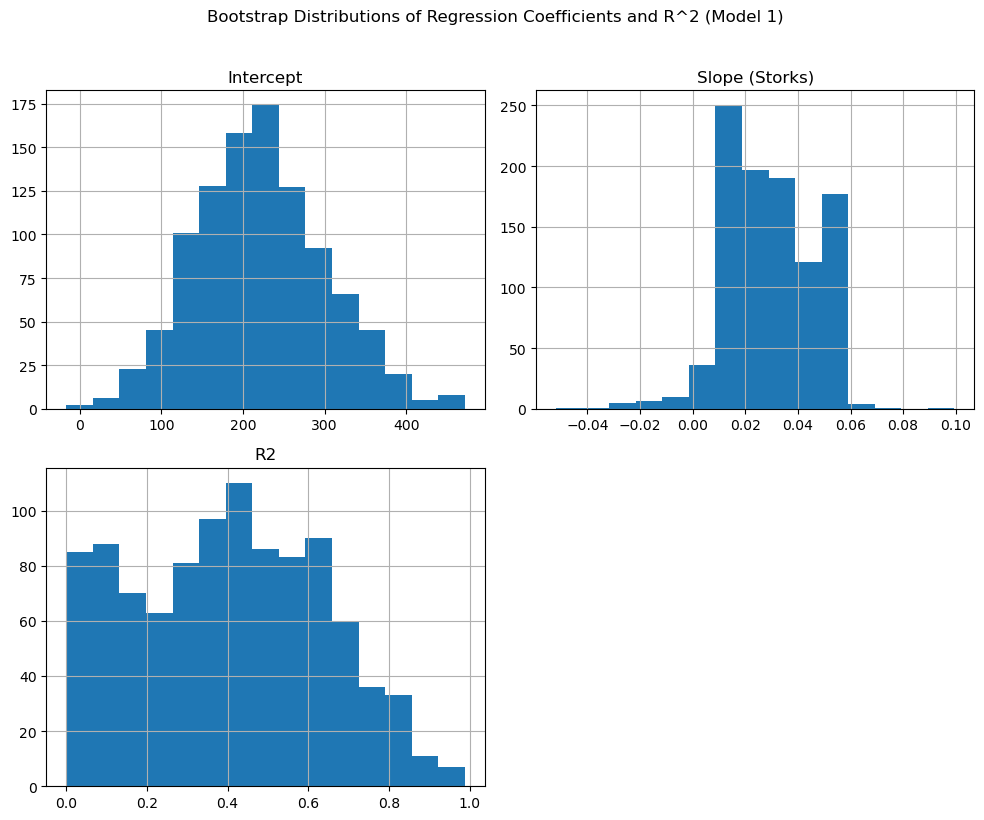

         Intercept  Slope (Storks)           R2
count  1000.000000     1000.000000  1000.000000
mean    221.443532        0.029570     0.399845
std      79.945374        0.016891     0.233170
min     -16.708025       -0.051945     0.000156
25%     167.159778        0.015393     0.205674
50%     217.695422        0.028419     0.406892
75%     271.976652        0.043292     0.578370
max     471.885405        0.099521     0.987744


In [123]:
bstrap.hist(figsize=(10, 8), bins=15)
plt.suptitle('Bootstrap Distributions of Regression Coefficients and R^2 (Model 1)', y=1.02)
plt.tight_layout()
plt.show()
print(bstrap.describe())

In [116]:
#  results with 90% confidence intervals
print("Intercept is %4.1f, with 90%% CI from %4.1f to %4.1f" % 
      (intercept, bstrap['Intercept'].quantile(0.05), bstrap['Intercept'].quantile(0.95)))

print("Slope (Storks) is %4.2f, with 90%% CI from %4.2f to %4.2f" % 
      (slope, bstrap['Slope (Storks)'].quantile(0.05), bstrap['Slope (Storks)'].quantile(0.95)))

print("The R² (coefficient of determination) is %4.2f, with 90%% CI from %4.2f to %4.2f" % 
      (r2, bstrap['R2'].quantile(0.05), bstrap['R2'].quantile(0.95)))

Intercept is 173.9, with 90% CI from 94.8 to 359.9
Slope (Storks) is 0.03, with 90% CI from 0.01 to 0.06
The R² (coefficient of determination) is 0.38, with 90% CI from 0.03 to 0.79


Conduct analogous analysis for Model 2:

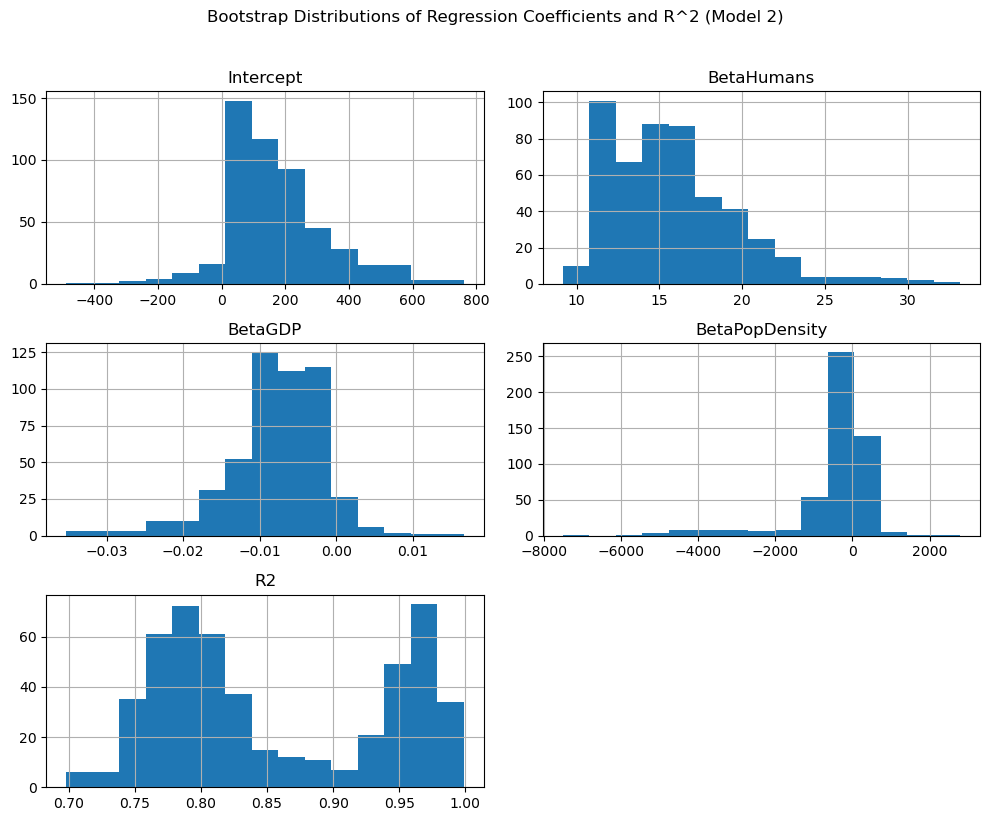

        Intercept  BetaHumans     BetaGDP  BetaPopDensity          R2
count  500.000000  500.000000  500.000000      500.000000  500.000000
mean   168.671279   15.780666   -0.007731     -429.515526    0.855911
std    157.222090    3.857508    0.006180     1081.918141    0.086127
min   -488.149575    9.147045   -0.035301    -7518.183051    0.698016
25%     72.846807   12.496995   -0.010532     -481.479473    0.781858
50%    142.185246   15.276746   -0.007099     -154.668615    0.822103
75%    238.332254   17.714521   -0.003433       75.844812    0.953988
max    760.739476   33.179108    0.016696     2791.687297    0.998795


In [117]:
bstrap_model2.hist(figsize=(10, 8), bins=15)
plt.suptitle('Bootstrap Distributions of Regression Coefficients and R^2 (Model 2)', y=1.02)
plt.tight_layout()
plt.show()

# Print summary statistics
print(bstrap_model2.describe())

In [118]:
intercept, beta_humans, beta_gdp, beta_popdensity, r2_model2 = doRegression_model2(df)

# 90% confidence interval results
print("Intercept is %4.1f, with 90%% CI from %4.1f to %4.1f" % 
      (intercept, 
       bstrap_model2['Intercept'].quantile(0.05), 
       bstrap_model2['Intercept'].quantile(0.95)))

print("Beta for Humans is %4.2f, with 90%% CI from %4.2f to %4.2f" % 
      (beta_humans, 
       bstrap_model2['BetaHumans'].quantile(0.05), 
       bstrap_model2['BetaHumans'].quantile(0.95)))

print("Beta for GDP_per_capita is %4.4f, with 90%% CI from %4.4f to %4.4f" % 
      (beta_gdp, 
       bstrap_model2['BetaGDP'].quantile(0.05), 
       bstrap_model2['BetaGDP'].quantile(0.95)))

print("Beta for PopDensity is %4.4f, with 90%% CI from %4.4f to %4.4f" % 
      (beta_popdensity, 
       bstrap_model2['BetaPopDensity'].quantile(0.05), 
       bstrap_model2['BetaPopDensity'].quantile(0.95)))

print("The R² (coefficient of determination) is %4.2f, with 90%% CI from %4.2f to %4.2f" % 
      (r2_model2, 
       bstrap_model2['R2'].quantile(0.05), 
       bstrap_model2['R2'].quantile(0.95)))

Intercept is 173.9, with 90% CI from -8.8 to 466.8
Beta for Humans is 15.08, with 90% CI from 11.19 to 22.68
Beta for GDP_per_capita is -0.0079, with 90% CI from -0.0190 to -0.0001
Beta for PopDensity is -274.8861, with 90% CI from -3003.8794 to 422.9804
The R² (coefficient of determination) is 0.77, with 90% CI from 0.75 to 0.98


**Now we are ready to estimate the RMSE Difference CI between the two models. The following steps are applied:**
1. Calculating RMSE for Each Bootstrap Sample: Compute RMSE values for both models on the resampled datasets.
2. Calculating RMSE Differences
3.  Visualising the Distribution of RMSE differences.
4. Estimating Confidence Intervals (90%, 95% and 99%)    

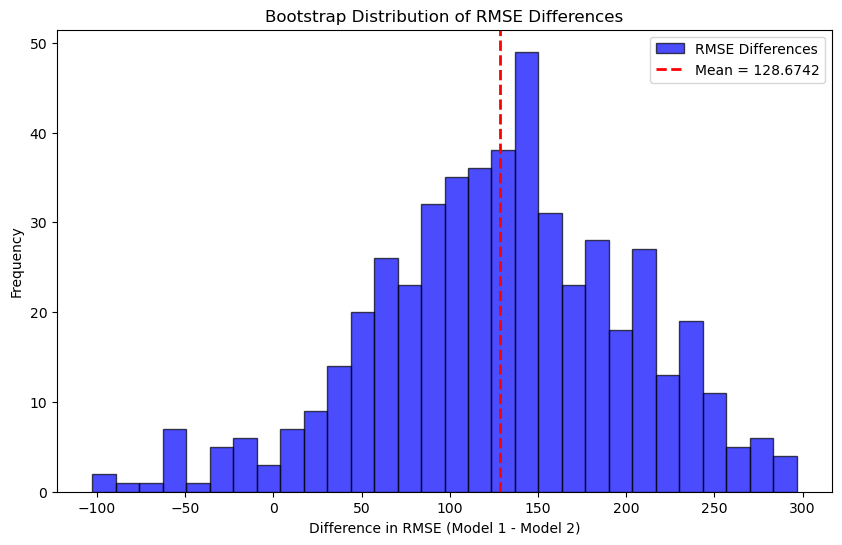

90% Confidence Interval for the RMSE Difference: [0.2244, 245.3140]
95% Confidence Interval for the RMSE Difference: [-32.8162, 263.1489]
99% Confidence Interval for the RMSE Difference: [-75.9184, 289.8137]


In [124]:
# Define RMSE calculation functions for both models
def compute_rmse_model1(df):

    X = df[['Storks']]
    y = df['BirthRate']
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

def compute_rmse_model2(df):

    X = df[['Humans', 'GDP_per_capita', 'PopDensity']]
    y = df['BirthRate']
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

# Bootstrap function to calculate RMSE differences
def bootstrap_rmse_difference(df, repeats):

    rmse_differences = []  # Store RMSE differences
    
    for _ in range(repeats):
        # Resample the data
        sample = resample(df)
        
        # Compute RMSE for both models
        rmse_model1 = compute_rmse_model1(sample)
        rmse_model2 = compute_rmse_model2(sample)
        
        # Calculate the difference in RMSE (Model 1 - Model 2)
        rmse_diff = rmse_model1 - rmse_model2
        rmse_differences.append(rmse_diff)
    
    return np.array(rmse_differences)

repeats = 500  # Number of bootstrap samples
rmse_differences = bootstrap_rmse_difference(df, repeats)

# Visualising the RMSE differences distribution
plt.figure(figsize=(10, 6))
plt.hist(rmse_differences, bins=30, color='blue', alpha=0.7, edgecolor='black', label='RMSE Differences')

#Vertical line for the mean of the RMSE differences
mean_rmse_diff = np.mean(rmse_differences)
plt.axvline(mean_rmse_diff, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_rmse_diff:.4f}')

plt.title('Bootstrap Distribution of RMSE Differences')
plt.xlabel('Difference in RMSE (Model 1 - Model 2)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 90% Confidence Interval
alpha_90 = 0.10
lower_bound_90 = np.percentile(rmse_differences, 100 * (alpha_90 / 2))
upper_bound_90 = np.percentile(rmse_differences, 100 * (1 - alpha_90 / 2))

print(f"90% Confidence Interval for the RMSE Difference: [{lower_bound_90:.4f}, {upper_bound_90:.4f}]")

# 95% Confidence Interval
alpha_95 = 0.05
lower_bound_95 = np.percentile(rmse_differences, 100 * (alpha_95 / 2))
upper_bound_95 = np.percentile(rmse_differences, 100 * (1 - alpha_95 / 2))

print(f"95% Confidence Interval for the RMSE Difference: [{lower_bound_95:.4f}, {upper_bound_95:.4f}]")

# 99% Confidence Interval
alpha_99 = 0.01
lower_bound_99 = np.percentile(rmse_differences, 100 * (alpha_99 / 2))
upper_bound_99 = np.percentile(rmse_differences, 100 * (1 - alpha_99 / 2))

print(f"99% Confidence Interval for the RMSE Difference: [{lower_bound_99:.4f}, {upper_bound_99:.4f}]")


## Section 4: Discussion




### **Principles of the Bootstrap Method**
The bootstrap method is a resampling technique used to estimate the sampling distribution of a statistic by repeatedly sampling (with replacement) from the original dataset. This method allows us to approximate the uncertainty in model parameters or predictions, especially when:
- Analytical solutions are not possible.
- The sample size is small.

**In this analysis:**
- The bootstrap distribution in our context is used to estimate the variability and confidence intervals of the RMSE differences and regression coefficients for the two models.
- Bootstrap distributions of RMSE differences and regression coefficients were generated for Models 1 and 2.
- Confidence intervals (CIs) were derived from the percentiles of the bootstrap distributions (e.g., 90%, 95%, 99% CIs).

The bootstrap method is particularly useful because it does not rely on strong parametric assumptions and provides robust estimates of variability and uncertainty.

---

### **Conclusion of the Test**

(Disclaimer: Since the assessor is re-running the notebook code, the values of the metrics below may be slightly different as they've been re-computed. Please take that into account)

 **Key Results**
- The bootstrap distribution of RMSE differences has a **mean of 128.67**, indicating that, on average, **Model 1 (`Storks`) has a higher RMSE compared to Model 2 (`Humans`, `GDP_per_capita`, `PopDensity`)**.
- The **90% CI for RMSE differences** is **[0.22, 245.31]**, entirely positive, suggesting that Model 2 consistently has a lower RMSE than Model 1.
- The **95% CI for RMSE differences** expands slightly to **[-32.82, 263.15]**, indicating some uncertainty.
- The 99% CI for RMSE differences is **[-75.92, 289.81]**, further widening the range, indicating greater variability in the data.
  
 **Interpretation**
- The **90% CI** suggests we can be confident that Model 2 outperforms Model 1 in terms of RMSE.
- The **95% CI**, however, shows a small possibility that Model 1 could perform as well or better than Model 2.
- The 99% CI reflects even greater variability in the RMSE differences, but the overall trend (mean of 128.67) still favors Model 2.

 **R² Comparison**
- Model 2 explains significantly more variability in the `BirthRate` (\( R^2 = 0.77 \), 90% CI: [0.75, 0.98]) compared to Model 1 (\( R^2 = 0.38 \), 90% CI: [0.03, 0.79]).

**Conclusion**
- Model 2 fits the data better than Model 1, as shown by lower RMSE and higher \( R^2 \).
- The results are robust, as supported by the bootstrap analysis.

---

### **What the Model Fits Tell Us About Birth Rate**

#### **Model 1 (`Storks`)**
- The relationship between the number of storks and birth rate is weak and likely coincidental.
- The slope of **0.03** is statistically significant within the CI (90% CI: [0.01, 0.06]), but the \( R^2 = 0.38 \) shows that **only 38% of the variance in `BirthRate` is explained by `Storks`**.
- This weak explanatory power suggests that stork numbers are not a meaningful predictor of birth rate.

#### **Model 2 (`Humans`, `GDP_per_capita`, `PopDensity`)**
- **Population size (`Humans`)** has a strong positive association with birth rate (slope: 15.08, 90% CI: [11.19, 22.68]), indicating that areas with more people tend to have higher birth rates.
- **GDP_per_capita** has a weak negative effect on birth rate (slope: -0.0079, 90% CI: [-0.0190, -0.0001]), suggesting wealthier regions may have slightly lower birth rates.
- **Population density (`PopDensity`)** shows a wide confidence interval (-274.88, 90% CI: [-3003.88, 422.98]), making its impact less conclusive, though a strong negative association cannot be ruled out.
- Model 2 explains **77% of the variance in `BirthRate`**, making it a significantly better fit than Model 1.

---

### **Final Interpretation**
The better fit of Model 2 indicates that real-world factors, such as **population size, GDP per capita, and population density**, are far more important in predicting birth rate than the number of storks. This is of course expected due to obvious biological factors. While Model 1 highlights an interesting correlation, Model 2 provides insights into potential causal relationships affecting birth rate. 

### There are a few possible causal explanations between the predictors in Model 2 and the birth rate:

**1. Population Size (Humans)**
* Causality Explanation: A larger population size provides a greater base for the number of births, as the absolute number of people directly correlates with the number of potential parents in a region.
* Mechanism: More people mean more families and higher aggregate birth counts, even if individual birth rates per family remain similar across regions.

**2. GDP per Capita (GDP_per_capita)**
* Causality Explanation: Higher GDP per capita is often associated with lower birth rates due to increased education levels, better access to contraception, and societal trends toward smaller families in wealthier regions.
* Mechanism: Economic development is linked with shifts in lifestyle, urbanization, delayed childbearing, and prioritisation of careers over larger family sizes, which tends to lower birth rates.

**3. Population Density (PopDensity)**
* Causality Explanation: High population density can discourage larger families due to limited space, higher living costs, and urbanization, which are often linked to reduced birth rates.
* Mechanism: In densely populated regions, constraints such as housing limitations, increased competition for resources, and lifestyle adaptations to urban living might contribute to smaller family sizes and lower birth rates.

